# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [36]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 73 (delta 22), reused 68 (delta 17), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/machine_learning_1/linear_regression/machine_learning_1/linear_regression/machine_learning_1/linear_regression


In [37]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [38]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


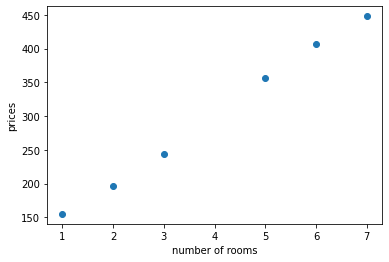

In [39]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [40]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [41]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predected_price = base_price + price_per_room * num_rooms
    base_price = base_price + learning_rate * (price - predected_price)
    price_per_room = price_per_room + learning_rate * num_rooms * (price - predected_price)
    return price_per_room, base_price

In [42]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predected_price = base_price + price_per_room * num_rooms
    if price > predected_price:
        base_price = base_price + learning_rate 
        price_per_room = price_per_room + learning_rate * num_rooms
    elif price < predected_price:
        base_price = base_price - learning_rate 
        price_per_room = price_per_room - learning_rate * num_rooms
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 50.27442185149009
Base price: 96.49795440295277


(50.27442185149009, 96.49795440295277)

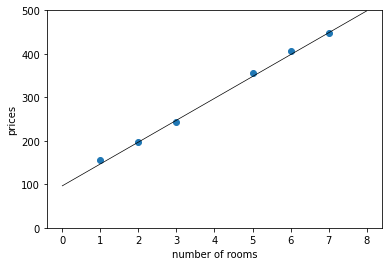

In [45]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 50000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    while epochs>0:
      #point
      i = np.random.randint(len(features))
      # price_per_room, base_price = square_trick(base_price, price_per_room, features [i], labels[i], learning_rate)
      price_per_room, base_price = absolute_trick(base_price, price_per_room, features [i], labels[i], learning_rate)
      epochs = epochs-1
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels)

### Root mean squared error function

In [47]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    error = np.sqrt((np.sum((predictions- labels)**2))/len(labels))

    return error

### Plotting the error function

Price per room: 50.08999243944174
Base price: 99.86565864603457


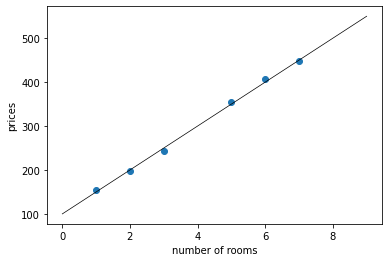

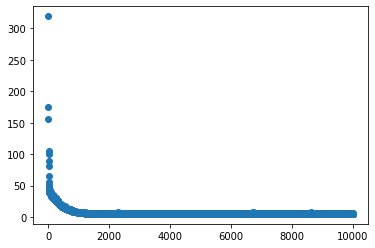

(50.08999243944174, 99.86565864603457)

In [49]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [54]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
features = features.reshape(-1, 1)
labels = labels.reshape(-1, 1)
regr.fit(features, labels)
# regr.score(features, labels)



0.9979437166148433

In [56]:
## TODO ##
# print the coefficients and bias of this model
print(regr.coef_)
print(regr.intercept_)


[[50.39285714]]
[99.5952381]


In [62]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
regr.predict(np.array([4]).reshape(-1,1))


array([[301.16666667]])

### Normal Equation



In [72]:
def Normal_Equation(features,labels):
    x = np.hstack((np.ones((len(features),1)), features))
    W = np.linalg.inv(x.T@x)@x.T@labels
    return W

W = Normal_Equation(features,labels)
print(W)

[[99.5952381 ]
 [50.39285714]]


In [71]:
# x = features.reshape(len(features),1)
# x = np.hstack((np.ones((len(features),1)), x))
# x